In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dill
from tqdm import tqdm
import sys
import os

# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.append(os.path.dirname(current_dir))

from analyze.report import calculate_vector_strength_from_result, calculate_vector_strength_from_result_polar


/Users/francescodesantis/.pyenv/versions/3.13.4/envs/hear_env/lib/python3.13/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [10]:
# List directory contents
result_dir = '/Users/francescodesantis/Library/CloudStorage/OneDrive-PolitecnicodiMilano/work/sound_localization/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 

whitenoise_70dB&TanCarney&subject_3.pic
harmonic_69dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_2.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_1.5kHz_70dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_1.pic
tone_1.kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
whitenoise_70dB&TanCarney&subject_5.pic
vs_data_100_ANFs_4_tones.pkl
tone_10.kHz_70dB&TanCarney&ild_only.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
whitenoise_70dB&TanCarney&subject_4.pic
vs_data_15_ANFs_15_tones.pkl
tone_10.kHz_70dB&TanCarney&itd_only.pic
tone_0.3kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
vs_data_8_ANFs_12_tones.pkl
tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_1.kHz_70dB&TanCarney&subject_1_myoga_inv.pic
tone_1.kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_1.3kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_10.kHz_70dB&TanCarney&su

In [11]:
title = 'vs_data_100_ANFs_4_tones.pkl'
result_path = result_dir + title

# Load data once per frequency
with open(result_path, "rb") as file:
    result = dill.load(file, ignore=True)


In [31]:
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlesize']= 'large'
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['axes.labelsize'] = 18    # Size of axis labels (x and y labels)
plt.rcParams['xtick.labelsize'] = 16   # Size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 16   # Size of y-axis tick labels
plt.rcParams['legend.fontsize'] = 14   # Size of the legend text
# Make axis labels bold
plt.rcParams['axes.labelweight'] = 'bold'  # Makes x and y axis labels bold
plt.rcParams['legend.title_fontsize'] = 14  # Makes x and y axis labels bold


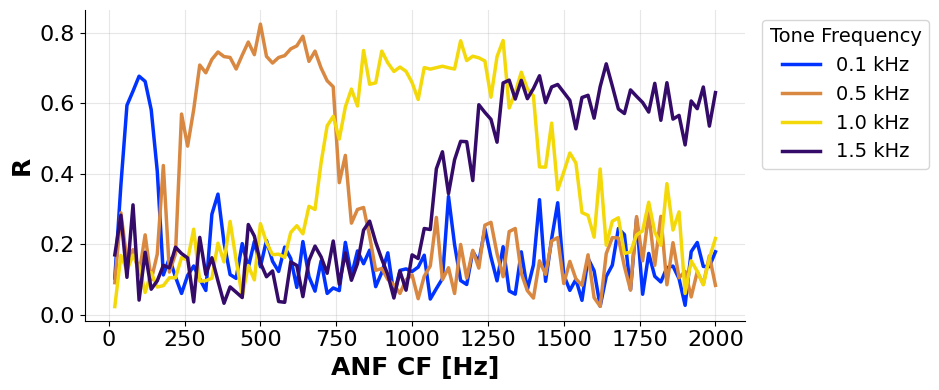

In [48]:
colors = [
    "#0033FF",  # Python Blue
    "#D98842",  # Slate Blue
    "#F4D90A",  # Steel Blue
    "#340B69",  # Teal Blue
]

fig, ax = plt.subplots(figsize = (9.5,4))
for i, tone in enumerate(result['tones_kHz']):
    ax.plot(result['cf_targets'], result['vs_data'][i], color = colors[i], label=f'{tone} kHz', linewidth = 2.5)

ax.set_xlabel('ANF CF [Hz]')
ax.set_ylabel('R')
ax.legend(title = 'Tone Frequency', bbox_to_anchor=(1.01, 1), loc='upper left', )
ax.grid(True, alpha=0.3)
fig.tight_layout()

In [39]:
title = 'vs_data_15_ANFs_15_tones.pkl'
result_path = result_dir + title

# Load data once per frequency
with open(result_path, "rb") as file:
    result_2 = dill.load(file, ignore=True)

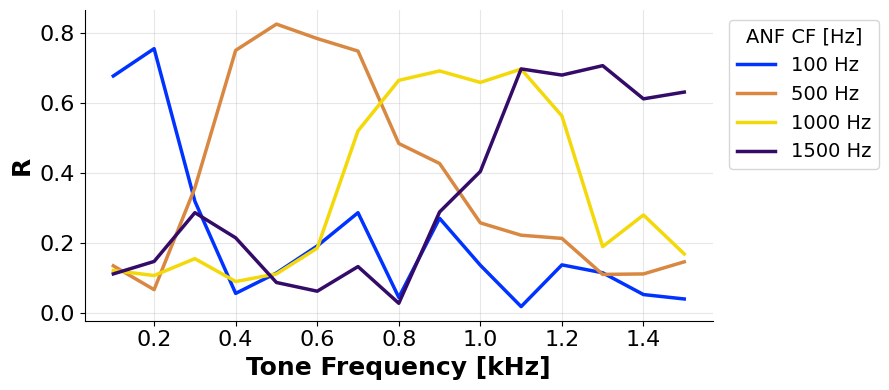

In [46]:
colors = [
    "#4E0F13",  # Python Blue
    "#09A689",  # Slate Blue
    "#C96DF3",  # Steel Blue
    "#D3370C",  # Teal Blue
]

colors = [
    "#0033FF",  # Python Blue
    "#D98842",  # Slate Blue
    "#F4D90A",  # Steel Blue
    "#340B69",  # Teal Blue
]

cf_set = [100,500,1000,1500]
indexes = [np.where(result_2['cf_targets'] == val)[0][0] for val in cf_set]

fig, ax = plt.subplots(figsize = (9,4))
for i in range(len(cf_set)):
    cf = cf_set[i]
    index = indexes[i]
    ax.plot(result_2['tones_kHz'], result_2['vs_data'][:,index], color = colors[i], label=f'{cf} Hz', linewidth = 2.5)

ax.set_xlabel('Tone Frequency [kHz]')
ax.set_ylabel('R')
ax.legend(title = 'ANF CF [Hz]', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.grid(True, alpha=0.3)
fig.tight_layout()